# Case Study I

1. Extract-Transform-Load (ETL)
2. Exploratory Data Analysis (EDA)
- Univariate Analysis
- Multivariate analysis
3. Feature Extraction / Selection
4. Cleaning/Preprocessing
- Fill
- Standardize Data (Non-include)
5. Model (Non-include)

# 1.Extract-Transform-Load (ETL)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [3]:
df.shape
#row = sample , column = feature

(4746, 12)

In [4]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [5]:
df.info()
#number -> int float text -> string(object) 
#Therefore, object to int,float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   int64  
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4739 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 445.1+ KB


In [6]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             7
Point of Contact     0
dtype: int64

# 2. Exploratory Data Analysis (EDA)

In [7]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4739.000000
mean,2.083860,3.499345e+04,967.490729,1.967293
std,0.832256,7.810641e+04,634.202328,0.884405
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [8]:
df['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [9]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [10]:
unfin = df['Furnishing Status'] == 'Unfurnished'
semifin = df['Furnishing Status'] == 'Semi-Furnished'
fin = df['Furnishing Status'] == 'Furnished'

In [11]:
df['Furnishing Status'][unfin] = 0
df['Furnishing Status'][semifin] = 1
df['Furnishing Status'][fin] = 2
#wrong

C:\Users\Guntsv\AppData\Local\Temp\ipykernel_14316\1055303519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Furnishing Status'][unfin] = 0
C:\Users\Guntsv\AppData\Local\Temp\ipykernel_14316\1055303519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Furnishing Status'][semifin] = 1
C:\Users\Guntsv\AppData\Local\Temp\ipykernel_14316\1055303519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Furnishing Status'][f

In [12]:
df['Furnishing Status'].unique()

array([0, 1, 2], dtype=object)

### Drop some sample due to outlier

In [13]:
outlier_rent = df['Rent'] > 1200000
df[outlier_rent]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,1,Bachelors,3.0,Contact Agent


In [14]:
sample_rent = np.where(outlier_rent)[0].tolist()
sample_rent

[1837]

In [15]:
df.shape

(4746, 12)

In [16]:
df.drop(sample_rent, inplace=True)

In [17]:
df.shape

(4745, 12)

In [18]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

## 2.1 Univariate

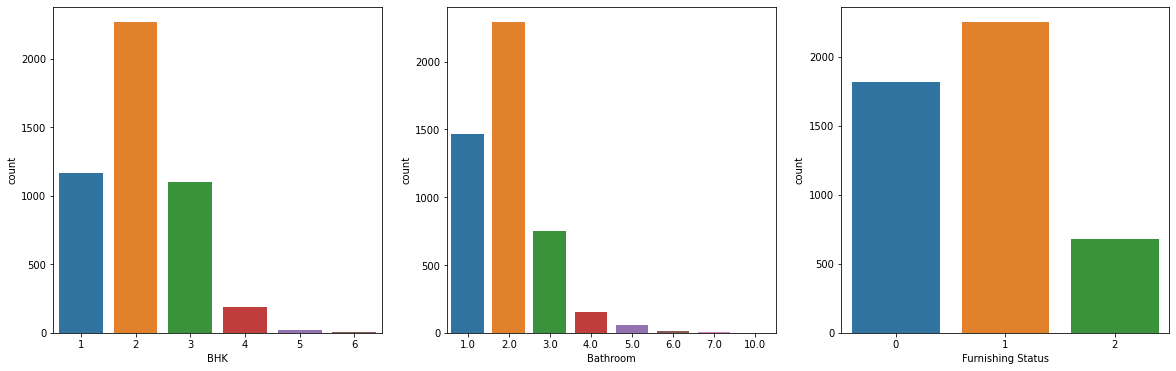

In [19]:
#Countplot Discrete Value
unis = ['BHK', 'Bathroom','Furnishing Status'] #discrete
plt.figure(figsize=(20,6))
for idx,uni in enumerate(unis):
    plt.subplot(1,3,idx+1)
    sns.countplot(data=df,x=uni)
plt.show()

In [20]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


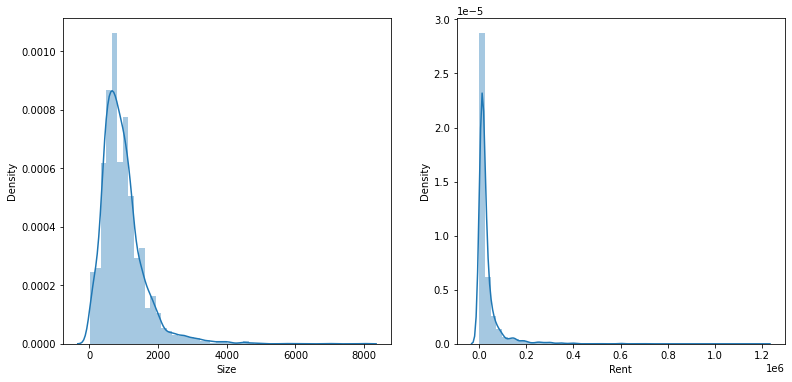

In [21]:
#Dist plot continuous value
cons = ['Size', 'Rent'] #discrete
plt.figure(figsize=(20,6))
for idx,con in enumerate(cons):
    plt.subplot(1,3,idx+1)
    sns.distplot(df[con])
plt.show()

## 2.2 Multivariate

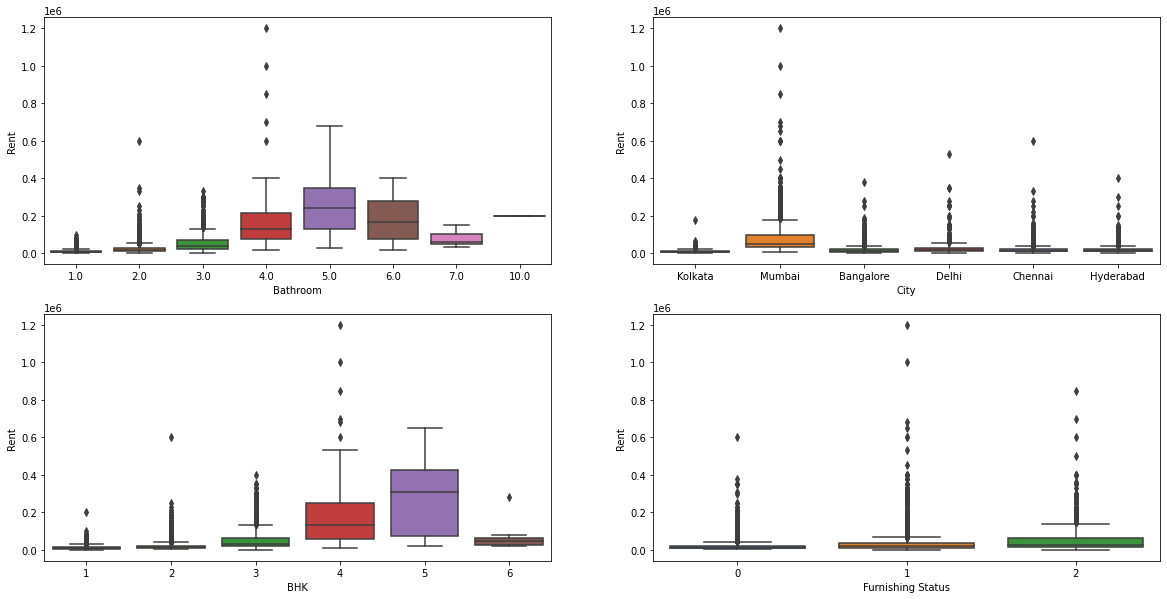

In [28]:
#Boxplot : 1 discrete and 1 continuous
x_list = ['Bathroom','City','BHK','Furnishing Status']
y = 'Rent'
plt.figure(figsize=(20,10))
for idx,x in enumerate(x_list):
    plt.subplot(2,2,idx+1)
    sns.boxplot(x=df[x],y=df[y])
plt.show()

In [30]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

<AxesSubplot:xlabel='Size', ylabel='Rent'>

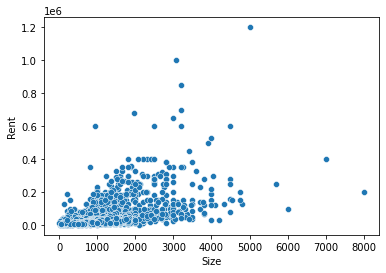

In [35]:
#Scatter plot : 2 continuous values
x = 'Size'
y = 'Rent'
sns.scatterplot(x=df[x],y=df[y])

<AxesSubplot:>

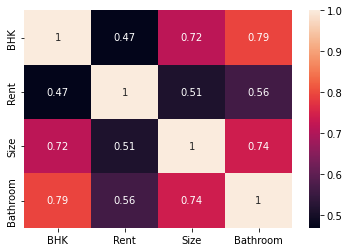

In [36]:
sns.heatmap(df.corr(),annot=True)

In [37]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

# 3. Feature Extraction / Selection

In [38]:
x = df[['Size','BHK','Bathroom']]
y = df['Rent']

# 4. Cleaning/Preprocessing
- Fill

In [43]:
df.Bathroom.isnull().sum()

7